In [410]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix,
    accuracy_score, precision_score, recall_score,
    f1_score
)
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz
from tabulate import tabulate

In [361]:
!git clone https://github.com/Nimish4545/Placement-Prediction-AI-Project.git

fatal: destination path 'Placement-Prediction-AI-Project' already exists and is not an empty directory.


In [362]:
df = pd.read_csv('/content/Placement-Prediction-AI-Project/output_data.csv')
df

,Name of Student,Roll No.,No. of DSA questions,CGPA,Knows ML,Knows DSA,Knows Python,Knows JavaScript,Knows HTML,Knows CSS,...,Age of Candidate,Branch of Engineering,Unnamed: 17,Internship_Role,Internship_Performance,Num_Internships,Finance_Minor_Score,Placement_Industry,Placement Package,PlacementStatus
0,Todd Pope,30678,151,8.52,Yes,Yes,Yes,Yes,No,Yes,...,24,Computer Science,NaN,Consulting Intern,5.1,1,0.0,High Paying IT,20.01,NaN
1,Sandra Brown,49191,24,1.23,Yes,No,No,Yes,No,No,...,18,Computer Science,NaN,Manager,5.4,2,0.0,IT Services,10.97,NaN
2,Mrs. Amanda Singleton,83519,333,9.85,No,Yes,Yes,No,Yes,No,...,25,Mechanical Engineering,NaN,Financial Analyst,7.6,2,45.4,Finance Related,7.51,NaN
3,Matthew Alvarado,56203,132,1.96,No,No,Yes,No,Yes,No,...,20,Computer Science,NaN,Consulting Intern,9.5,3,0.0,IT Services,4.96,NaN
4,Christine Smith,82173,198,9.73,Yes,Yes,Yes,Yes,Yes,Yes,...,21,Electrical Engineering,NaN,Finance Intern,5.4,3,43.5,High Paying IT,46.30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219995,Ashley Conner,36698,453,8.77,No,Yes,No,Yes,No,Yes,...,24,Electrical Engineering,NaN,Civil Site Intern,6.8,4,0.0,High Paying IT,24.81,NaN
219996,Samuel Kemp,85027,375,6.15,No,No,Yes,Yes,No,No,...,18,Electrical Engineering,NaN,Designer,9.1,3,36.4,Finance Related,11.00,NaN
219997,Alexander Payne,92497,52,2.05,No,No,No,No,Yes,No,...,25,Computer Science,NaN,Manager,7.2,3,0.0,IT Services,3.82,NaN
219998,Sean Bauer,35235,404,5.63,No,No,Yes,Yes,No,Yes,...,21,Mechanical Engineering,NaN,Automotive Engineering Intern,5.1,3,0.0,Mechanical Related,47.80,NaN


In [363]:
df.drop(['Unnamed: 17','PlacementStatus'],axis=1,inplace=True)
df.columns

Index(['Name of Student', 'Roll No.', 'No. of DSA questions', 'CGPA',
       'Knows ML', 'Knows DSA', 'Knows Python', 'Knows JavaScript',
       'Knows HTML', 'Knows CSS', 'Knows Cricket', 'Knows Dance',
       'Participated in College Fest', 'Was in Coding Club', 'No. of backlogs',
       'Age of Candidate', 'Branch of Engineering', 'Internship_Role',
       'Internship_Performance', 'Num_Internships', 'Finance_Minor_Score',
       'Placement_Industry', 'Placement Package'],
      dtype='object')

In [364]:
df.isnull().sum()

,0
Name of Student,0
Roll No.,0
No. of DSA questions,0
CGPA,0
Knows ML,4419
Knows DSA,0
Knows Python,4427
Knows JavaScript,4282
Knows HTML,4329
Knows CSS,4322


In [365]:
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [366]:
object_cols = df.select_dtypes(include='object').columns
df.dropna(subset=object_cols, inplace=True)

In [367]:
df.isnull().sum()

,0
Name of Student,0
Roll No.,0
No. of DSA questions,0
CGPA,0
Knows ML,0
Knows DSA,0
Knows Python,0
Knows JavaScript,0
Knows HTML,0
Knows CSS,0


In [368]:
df_new=df[['Name of Student','Roll No.']]
df_new

,Name of Student,Roll No.
0,Todd Pope,30678
1,Sandra Brown,49191
2,Mrs. Amanda Singleton,83519
3,Matthew Alvarado,56203
4,Christine Smith,82173
...,...,...
219995,Ashley Conner,36698
219996,Samuel Kemp,85027
219997,Alexander Payne,92497
219998,Sean Bauer,35235


In [369]:
df.drop('Name of Student',axis=1,inplace=True)
df

,Roll No.,No. of DSA questions,CGPA,Knows ML,Knows DSA,Knows Python,Knows JavaScript,Knows HTML,Knows CSS,Knows Cricket,...,Was in Coding Club,No. of backlogs,Age of Candidate,Branch of Engineering,Internship_Role,Internship_Performance,Num_Internships,Finance_Minor_Score,Placement_Industry,Placement Package
0,30678,151,8.52,Yes,Yes,Yes,Yes,No,Yes,No,...,Yes,2,24,Computer Science,Consulting Intern,5.1,1,0.0,High Paying IT,20.01
1,49191,24,1.23,Yes,No,No,Yes,No,No,Yes,...,Yes,1,18,Computer Science,Manager,5.4,2,0.0,IT Services,10.97
2,83519,333,9.85,No,Yes,Yes,No,Yes,No,No,...,No,1,25,Mechanical Engineering,Financial Analyst,7.6,2,45.4,Finance Related,7.51
3,56203,132,1.96,No,No,Yes,No,Yes,No,No,...,No,4,20,Computer Science,Consulting Intern,9.5,3,0.0,IT Services,4.96
4,82173,198,9.73,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,No,1,21,Electrical Engineering,Finance Intern,5.4,3,43.5,High Paying IT,46.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219995,36698,453,8.77,No,Yes,No,Yes,No,Yes,No,...,Yes,5,24,Electrical Engineering,Civil Site Intern,6.8,4,0.0,High Paying IT,24.81
219996,85027,375,6.15,No,No,Yes,Yes,No,No,No,...,No,3,18,Electrical Engineering,Designer,9.1,3,36.4,Finance Related,11.00
219997,92497,52,2.05,No,No,No,No,Yes,No,No,...,Yes,4,25,Computer Science,Manager,7.2,3,0.0,IT Services,3.82
219998,35235,404,5.63,No,No,Yes,Yes,No,Yes,No,...,Yes,0,21,Mechanical Engineering,Automotive Engineering Intern,5.1,3,0.0,Mechanical Related,47.80


In [370]:
target_column = 'Placement_Industry'
x = df.drop(target_column, axis=1)
y = df[target_column]

In [371]:
x

,Roll No.,No. of DSA questions,CGPA,Knows ML,Knows DSA,Knows Python,Knows JavaScript,Knows HTML,Knows CSS,Knows Cricket,...,Participated in College Fest,Was in Coding Club,No. of backlogs,Age of Candidate,Branch of Engineering,Internship_Role,Internship_Performance,Num_Internships,Finance_Minor_Score,Placement Package
0,30678,151,8.52,Yes,Yes,Yes,Yes,No,Yes,No,...,Yes,Yes,2,24,Computer Science,Consulting Intern,5.1,1,0.0,20.01
1,49191,24,1.23,Yes,No,No,Yes,No,No,Yes,...,No,Yes,1,18,Computer Science,Manager,5.4,2,0.0,10.97
2,83519,333,9.85,No,Yes,Yes,No,Yes,No,No,...,No,No,1,25,Mechanical Engineering,Financial Analyst,7.6,2,45.4,7.51
3,56203,132,1.96,No,No,Yes,No,Yes,No,No,...,Yes,No,4,20,Computer Science,Consulting Intern,9.5,3,0.0,4.96
4,82173,198,9.73,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,No,No,1,21,Electrical Engineering,Finance Intern,5.4,3,43.5,46.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219995,36698,453,8.77,No,Yes,No,Yes,No,Yes,No,...,No,Yes,5,24,Electrical Engineering,Civil Site Intern,6.8,4,0.0,24.81
219996,85027,375,6.15,No,No,Yes,Yes,No,No,No,...,No,No,3,18,Electrical Engineering,Designer,9.1,3,36.4,11.00
219997,92497,52,2.05,No,No,No,No,Yes,No,No,...,Yes,Yes,4,25,Computer Science,Manager,7.2,3,0.0,3.82
219998,35235,404,5.63,No,No,Yes,Yes,No,Yes,No,...,No,Yes,0,21,Mechanical Engineering,Automotive Engineering Intern,5.1,3,0.0,47.80


In [372]:
y

,Placement_Industry
0,High Paying IT
1,IT Services
2,Finance Related
3,IT Services
4,High Paying IT
...,...
219995,High Paying IT
219996,Finance Related
219997,IT Services
219998,Mechanical Related


In [ ]:
le = preprocessing.LabelEncoder()

column_encodings = {}

for col in x.select_dtypes(include='object').columns:
    x[col] = x[col].astype(str).str.lower()
    x[col] = le.fit_transform(x[col])
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    column_encodings[col] = mapping
    print(f"Mapping for column '{col}': {mapping}")

if y.dtype == 'object' or y.apply(type).nunique() > 1:
    y = y.astype(str).str.lower()
    y = le.fit_transform(y)
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    column_encodings['Placement Industry'] = mapping
    print(f"Mapping for target column: {mapping}")

Mapping for column 'Knows ML': {'no': np.int64(0), 'yes': np.int64(1)}
Mapping for column 'Knows DSA': {'no': np.int64(0), 'yes': np.int64(1)}
Mapping for column 'Knows Python': {'no': np.int64(0), 'yes': np.int64(1)}
Mapping for column 'Knows JavaScript': {'no': np.int64(0), 'yes': np.int64(1)}
Mapping for column 'Knows HTML': {'no': np.int64(0), 'yes': np.int64(1)}
Mapping for column 'Knows CSS': {'no': np.int64(0), 'yes': np.int64(1)}
Mapping for column 'Knows Cricket': {'no': np.int64(0), 'yes': np.int64(1)}
Mapping for column 'Knows Dance': {'no': np.int64(0), 'yes': np.int64(1)}
Mapping for column 'Participated in College Fest': {'no': np.int64(0), 'yes': np.int64(1)}
Mapping for column 'Was in Coding Club': {'no': np.int64(0), 'yes': np.int64(1)}
Mapping for column 'Branch of Engineering': {'civil engineering': np.int64(0), 'computer science': np.int64(1), 'electrical engineering': np.int64(2), 'mechanical engineering': np.int64(3)}
Mapping for column 'Internship_Role': {'analys

In [374]:
column_encodings['Branch of Engineering']

{'civil engineering': np.int64(0),
 'computer science': np.int64(1),
 'electrical engineering': np.int64(2),
 'mechanical engineering': np.int64(3)}

In [375]:
column_encodings['Internship_Role']

{'analyst': np.int64(0),
 'automotive engineering intern': np.int64(1),
 'business analyst': np.int64(2),
 'civil site intern': np.int64(3),
 'construction management intern': np.int64(4),
 'consulting intern': np.int64(5),
 'designer': np.int64(6),
 'developer': np.int64(7),
 'electrical design intern': np.int64(8),
 'embedded systems intern': np.int64(9),
 'finance intern': np.int64(10),
 'financial analyst': np.int64(11),
 'manager': np.int64(12),
 'manufacturing engineer intern': np.int64(13),
 'mechanical design intern': np.int64(14),
 'mechanical draftsman intern': np.int64(15),
 'power systems intern': np.int64(16),
 'r&d intern \x13 finite element analysis': np.int64(17),
 'researcher': np.int64(18),
 'structural intern': np.int64(19)}

In [376]:
column_encodings['Placement Industry']

{'civil related': np.int64(0),
 'electrical related': np.int64(1),
 'finance related': np.int64(2),
 'high paying it': np.int64(3),
 'it services': np.int64(4),
 'mechanical related': np.int64(5)}

In [377]:
mapping = {0:"civil related",
           1:"electrical related",
           2:"finance related",
           3:"high paying it",
           4:"it services",
           5:"mechanical related"}

In [378]:
x

,Roll No.,No. of DSA questions,CGPA,Knows ML,Knows DSA,Knows Python,Knows JavaScript,Knows HTML,Knows CSS,Knows Cricket,...,Participated in College Fest,Was in Coding Club,No. of backlogs,Age of Candidate,Branch of Engineering,Internship_Role,Internship_Performance,Num_Internships,Finance_Minor_Score,Placement Package
0,30678,151,8.52,1,1,1,1,0,1,0,...,1,1,2,24,1,5,5.1,1,0.0,20.01
1,49191,24,1.23,1,0,0,1,0,0,1,...,0,1,1,18,1,12,5.4,2,0.0,10.97
2,83519,333,9.85,0,1,1,0,1,0,0,...,0,0,1,25,3,11,7.6,2,45.4,7.51
3,56203,132,1.96,0,0,1,0,1,0,0,...,1,0,4,20,1,5,9.5,3,0.0,4.96
4,82173,198,9.73,1,1,1,1,1,1,1,...,0,0,1,21,2,10,5.4,3,43.5,46.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219995,36698,453,8.77,0,1,0,1,0,1,0,...,0,1,5,24,2,3,6.8,4,0.0,24.81
219996,85027,375,6.15,0,0,1,1,0,0,0,...,0,0,3,18,2,6,9.1,3,36.4,11.00
219997,92497,52,2.05,0,0,0,0,1,0,0,...,1,1,4,25,1,12,7.2,3,0.0,3.82
219998,35235,404,5.63,0,0,1,1,0,1,0,...,0,1,0,21,3,1,5.1,3,0.0,47.80


In [379]:
y

array([3, 4, 2, ..., 4, 5, 1])

In [380]:
def get_classes_distribution(df):
    label_counts = df.value_counts()

    total_samples = len(df)

    for i in range(len(label_counts)):
        index_value = label_counts.index[i]
        index_value = index_value[0] if isinstance(index_value, tuple) else index_value
        label = mapping[int(index_value)]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))

In [381]:
def plot_label_per_class(data):
    data = pd.DataFrame(data, columns=['Placement_Industry'])
    print(data)
    data['Industry'] = data['Placement_Industry'].astype(int).map(mapping)
    ordered_labels = [mapping[i] for i in range(6)]

    plt.figure(figsize=(12, 5))

    ax = sns.countplot(
        x='Industry',
        data=data,
        order=ordered_labels,
        palette='tab10'
    )

    ax.set_title("Number of Examples per Class", fontsize=14)
    ax.set_xlabel("Class Label", fontsize=12)
    ax.set_ylabel("Count", fontsize=12)

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height + 1),
                    ha='center', va='bottom', fontsize=10)

    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [382]:
label=get_classes_distribution(pd.DataFrame(y))

finance related     :   66607 or 33.461269887519656%
high paying it      :   38988 or 19.586349638545745%
electrical related  :   23543 or 11.827265557101734%
mechanical related  :   23482 or 11.79662106833721%
it services         :   23234 or 11.672033638606027%
civil related       :   23203 or 11.65646020988963%


        Placement_Industry
0                        3
1                        4
2                        2
3                        4
4                        3
...                    ...
199052                   3
199053                   2
199054                   4
199055                   5
199056                   1

[199057 rows x 1 columns]


<ipython-input-381-04d590d18908>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


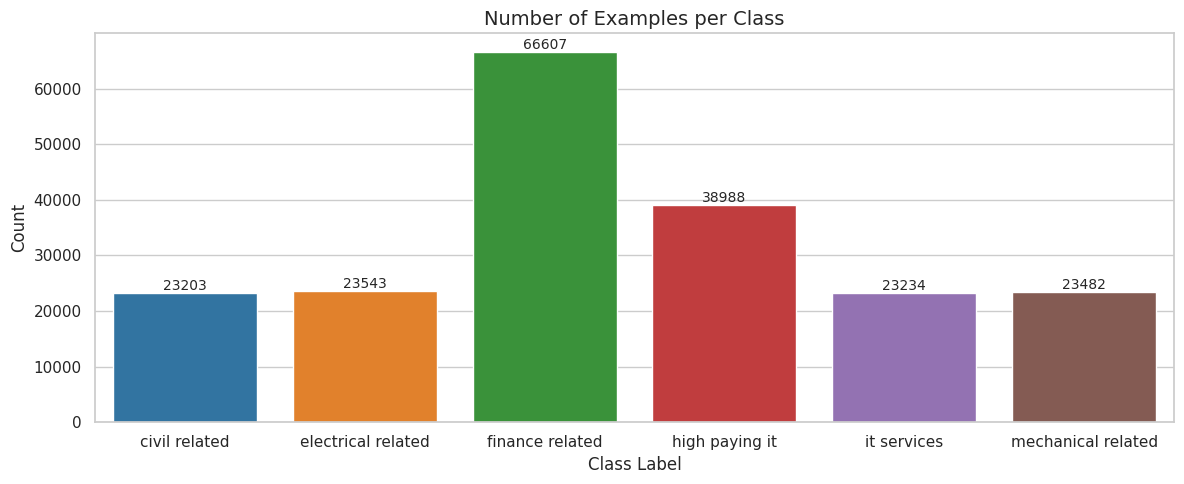

In [383]:
plot_label_per_class(y)

In [384]:
preprocessed_df = x.copy()
preprocessed_df[target_column] = y
preprocessed_df.to_csv('/content/Placement-Prediction-AI-Project/Preprocessed_Placements.csv', index=False)

In [385]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)

        Placement_Industry
0                        3
1                        0
2                        2
3                        2
4                        1
...                    ...
139334                   1
139335                   2
139336                   2
139337                   5
139338                   5

[139339 rows x 1 columns]


<ipython-input-381-04d590d18908>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


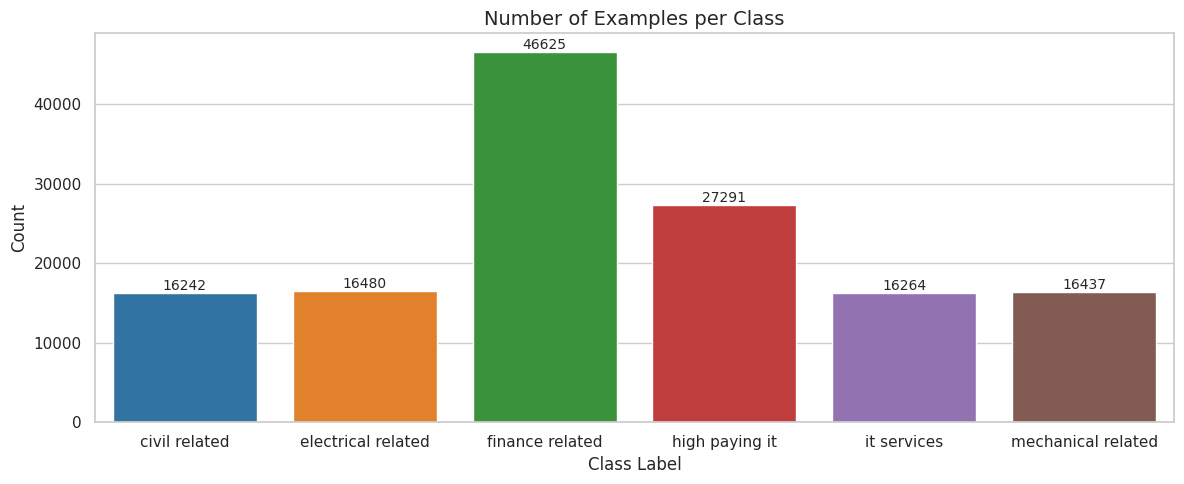

In [386]:
plot_label_per_class(y_train)

       Placement_Industry
0                       0
1                       3
2                       3
3                       5
4                       3
...                   ...
59713                   2
59714                   3
59715                   4
59716                   2
59717                   3

[59718 rows x 1 columns]


<ipython-input-381-04d590d18908>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


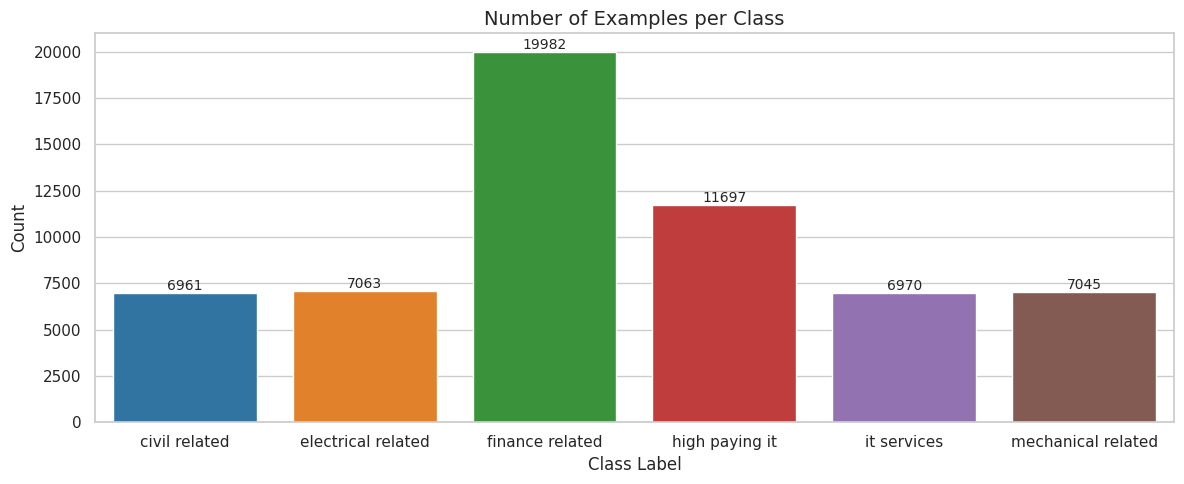

In [387]:
plot_label_per_class(y_test)

In [ ]:
model_DT = DecisionTreeClassifier(max_depth=4) 
model_DT.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [389]:
y_train_pred_DT = model_DT.predict(x_train)
y_test_pred_DT = model_DT.predict(x_test)

train_acc = accuracy_score(y_train, y_train_pred_DT)
test_acc = accuracy_score(y_test, y_test_pred_DT)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy    : {test_acc:.4f}\n")

Training Accuracy: 0.8829
Test Accuracy    : 0.8831



Classification Report on Test Data:
              precision    recall  f1-score   support

           0       1.00      0.01      0.01      6961
           1       1.00      0.99      1.00      7063
           2       1.00      1.00      1.00     19982
           3       1.00      1.00      1.00     11697
           4       0.50      1.00      0.67      6970
           5       1.00      1.00      1.00      7045

    accuracy                           0.88     59718
   macro avg       0.92      0.83      0.78     59718
weighted avg       0.94      0.88      0.85     59718



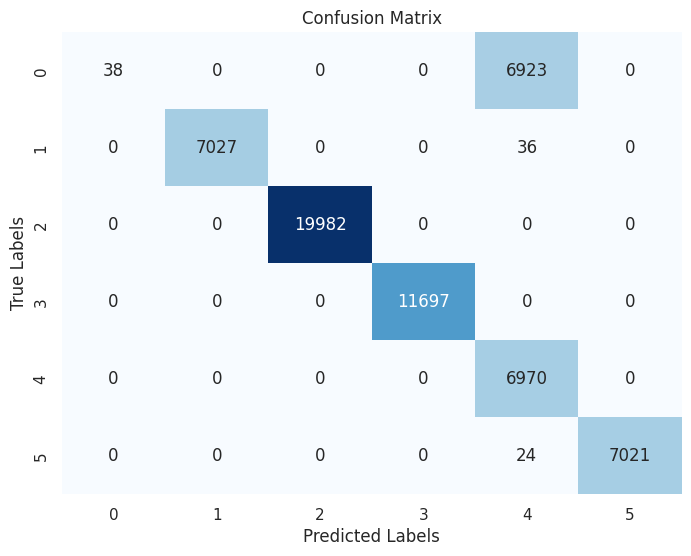

In [390]:
print("Classification Report on Test Data:")
print(classification_report(y_test, y_test_pred_DT))
cm = confusion_matrix(y_test, y_test_pred_DT)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

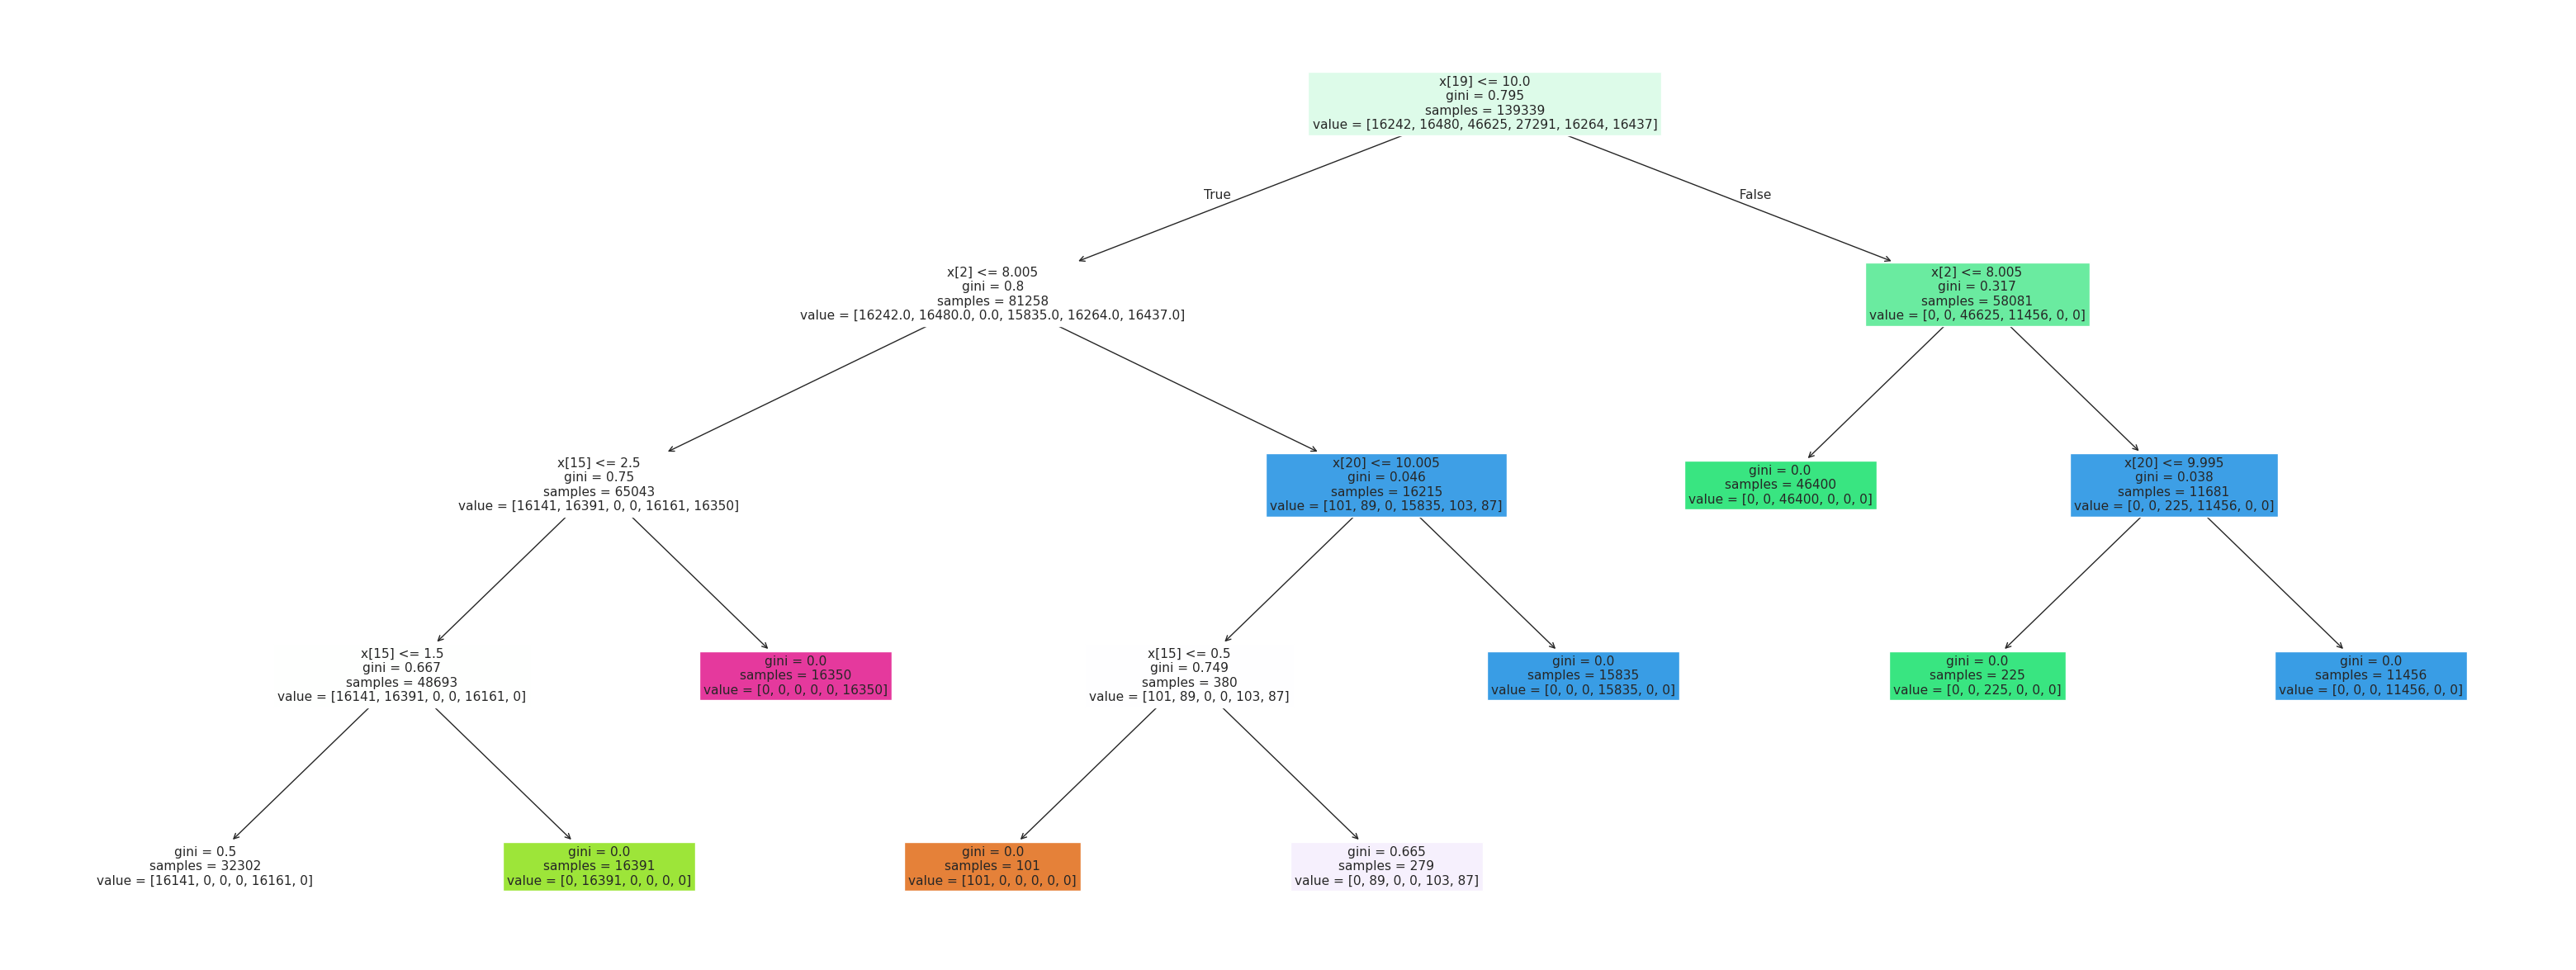

In [391]:
plt.figure(figsize=(40,15))
tree.plot_tree(model_DT, max_depth=5, filled=True)
plt.show()

In [ ]:
model_RF = RandomForestClassifier(max_depth=4, random_state=0) 
model_RF.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, random_state=0)

In [393]:
y_train_pred_RF = model_RF.predict(x_train)
y_test_pred_RF = model_RF.predict(x_test)

train_acc = accuracy_score(y_train, y_train_pred_RF)
test_acc = accuracy_score(y_test, y_test_pred_RF)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy    : {test_acc:.4f}\n")

Training Accuracy: 0.9896
Test Accuracy    : 0.9899



Classification Report on Test Data:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      6961
           1       1.00      0.98      0.99      7063
           2       0.98      1.00      0.99     19982
           3       0.99      1.00      0.99     11697
           4       1.00      0.94      0.97      6970
           5       1.00      1.00      1.00      7045

    accuracy                           0.99     59718
   macro avg       0.99      0.99      0.99     59718
weighted avg       0.99      0.99      0.99     59718



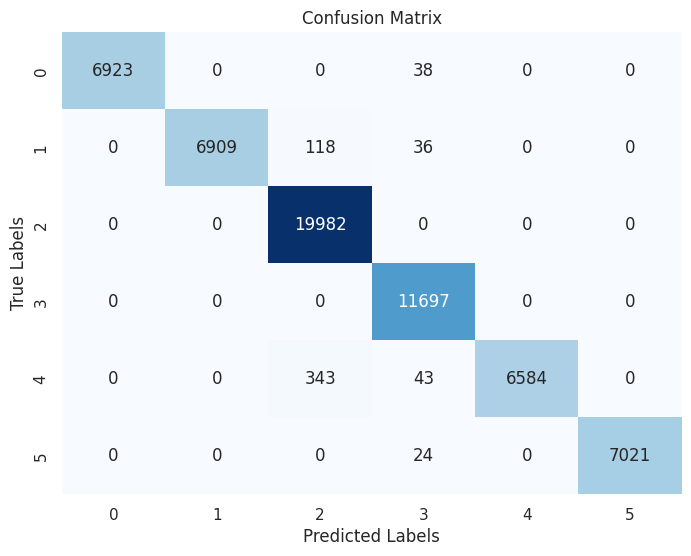

In [394]:
print("Classification Report on Test Data:")
print(classification_report(y_test, y_test_pred_RF))
cm = confusion_matrix(y_test, y_test_pred_RF)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

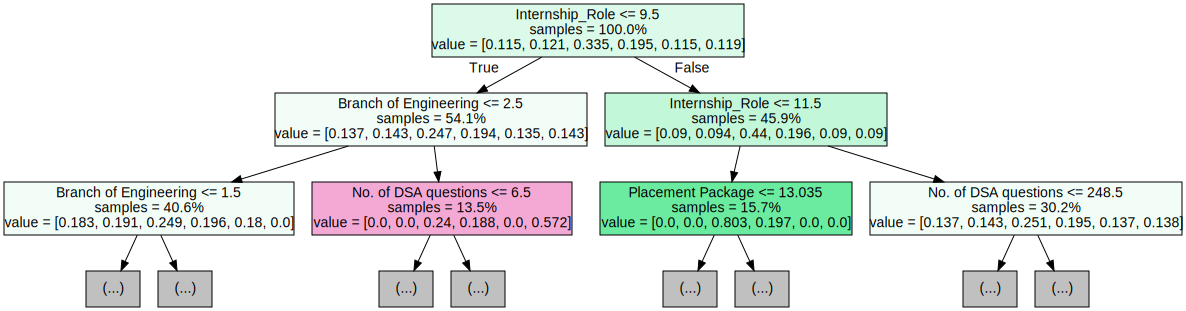

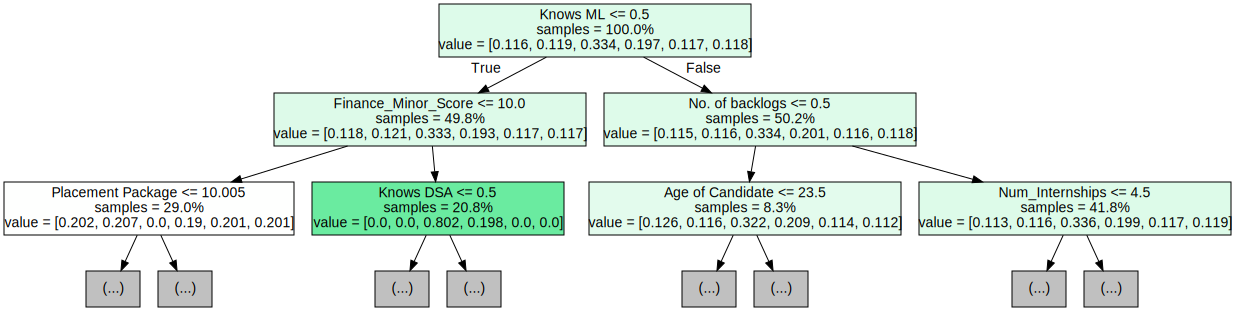

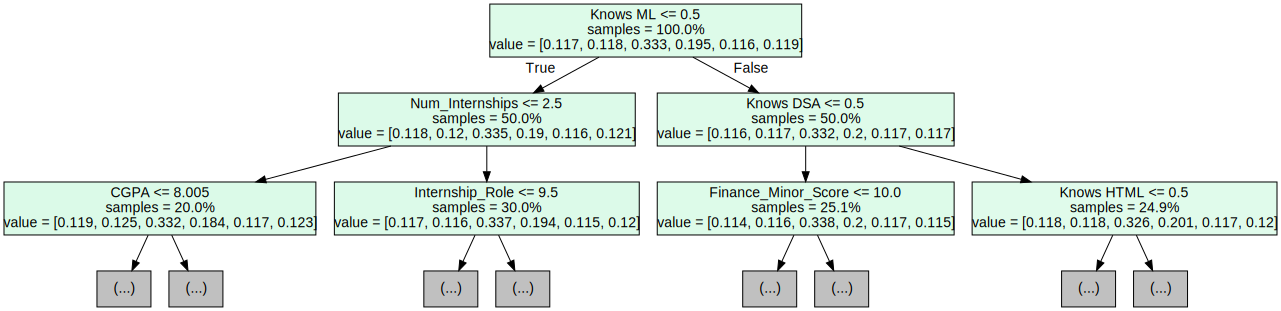

In [395]:
for i in range(3):
    tree = model_RF.estimators_[i]
    data = export_graphviz(tree,feature_names=x_train.columns,filled=True,max_depth=2,impurity=False,proportion=True)
    RandomForestgraph = graphviz.Source(data)
    display(RandomForestgraph)

In [396]:
model_NB = GaussianNB()
model_NB.fit(x_train, y_train)

GaussianNB()

In [397]:
y_train_pred_NB = model_NB.predict(x_train)
y_test_pred_NB = model_NB.predict(x_test)

train_acc = accuracy_score(y_train, y_train_pred_NB)
test_acc = accuracy_score(y_test, y_test_pred_NB)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy    : {test_acc:.4f}\n")

Training Accuracy: 0.9033
Test Accuracy    : 0.9032



Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      6961
           1       0.88      1.00      0.94      7063
           2       0.98      0.95      0.96     19982
           3       0.86      0.60      0.71     11697
           4       0.88      1.00      0.94      6970
           5       0.86      1.00      0.92      7045

    accuracy                           0.90     59718
   macro avg       0.89      0.92      0.90     59718
weighted avg       0.90      0.90      0.90     59718



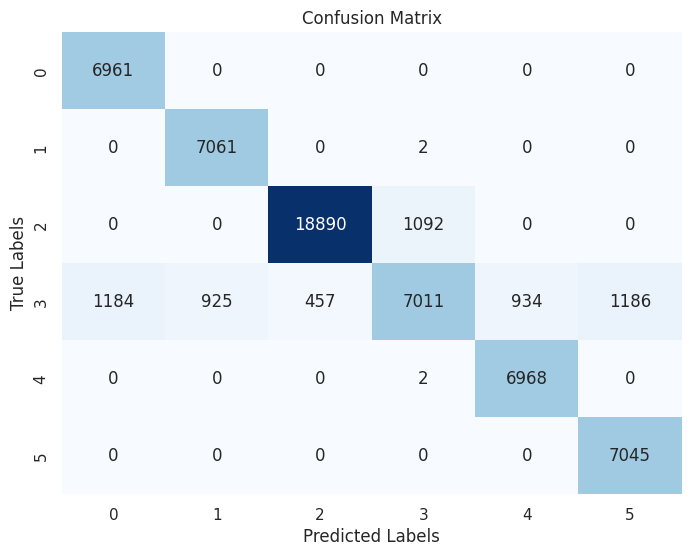

In [398]:
print("Classification Report on Test Data:")
print(classification_report(y_test, y_test_pred_NB))
cm = confusion_matrix(y_test, y_test_pred_NB)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [399]:
model_XGB = xgb.XGBClassifier(objective="multi:softprob", random_state=42,max_depth=3)
model_XGB.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [400]:
y_train_pred_XGB = model_XGB.predict(x_train)
y_test_pred_XGB = model_XGB.predict(x_test)

train_acc = accuracy_score(y_train, y_train_pred_XGB)
test_acc = accuracy_score(y_test, y_test_pred_XGB)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy    : {test_acc:.4f}\n")

Training Accuracy: 1.0000
Test Accuracy    : 0.9999



Classification Report on Test Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6961
           1       1.00      1.00      1.00      7063
           2       1.00      1.00      1.00     19982
           3       1.00      1.00      1.00     11697
           4       1.00      1.00      1.00      6970
           5       1.00      1.00      1.00      7045

    accuracy                           1.00     59718
   macro avg       1.00      1.00      1.00     59718
weighted avg       1.00      1.00      1.00     59718



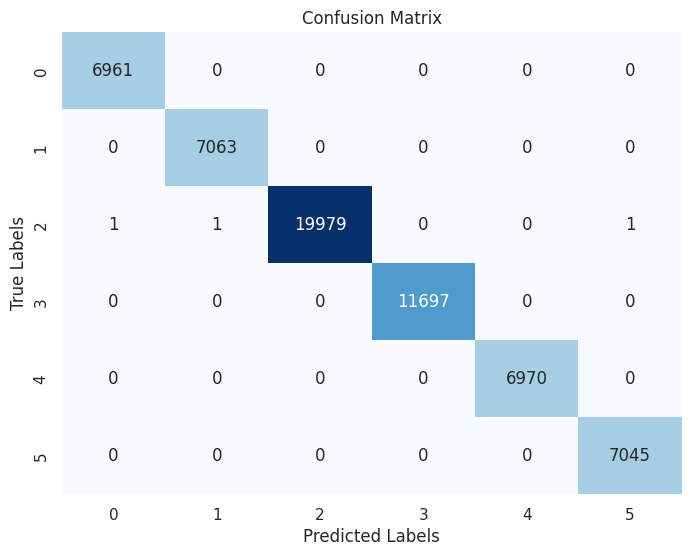

In [401]:
print("Classification Report on Test Data:")
print(classification_report(y_test, y_test_pred_XGB))
cm = confusion_matrix(y_test, y_test_pred_XGB)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [402]:
model_MLP = MLPClassifier(hidden_layer_sizes=(512,256,128, 64),activation='relu',solver='adam',max_iter=100,random_state=42,verbose=True)                  # prints loss per epoch
model_MLP.fit(x_train, y_train)

Iteration 1, loss = 20.91163905
Iteration 2, loss = 6.86158461
Iteration 3, loss = 1.80459548
Iteration 4, loss = 1.34495712
Iteration 5, loss = 2.30271673
Iteration 6, loss = 1.69198933
Iteration 7, loss = 1.70224008
Iteration 8, loss = 1.70268495
Iteration 9, loss = 1.69217425
Iteration 10, loss = 1.69178520
Iteration 11, loss = 1.69179955
Iteration 12, loss = 1.69831133
Iteration 13, loss = 1.69181138
Iteration 14, loss = 1.69181928
Iteration 15, loss = 1.69178818
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(512, 256, 128, 64), max_iter=100,
              random_state=42, verbose=True)

In [403]:
y_train_pred_MLP = model_MLP.predict(x_train)
y_test_pred_MLP = model_MLP.predict(x_test)

train_acc = accuracy_score(y_train, y_train_pred_MLP)
test_acc = accuracy_score(y_test, y_test_pred_MLP)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy    : {test_acc:.4f}\n")

Training Accuracy: 0.3346
Test Accuracy    : 0.3346



Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6961
           1       0.00      0.00      0.00      7063
           2       0.33      1.00      0.50     19982
           3       0.00      0.00      0.00     11697
           4       0.00      0.00      0.00      6970
           5       0.00      0.00      0.00      7045

    accuracy                           0.33     59718
   macro avg       0.06      0.17      0.08     59718
weighted avg       0.11      0.33      0.17     59718



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


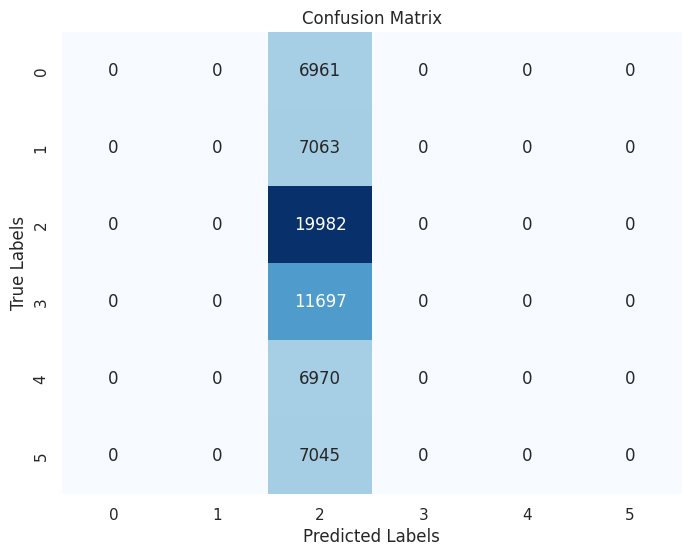

In [404]:
print("Classification Report on Test Data:")
print(classification_report(y_test, y_test_pred_MLP))
cm = confusion_matrix(y_test, y_test_pred_MLP)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [412]:
data = {
    'Model': ['Naive Bayes', 'Decision Tree', 'Random Forest', 'XGBoost', 'MLP'],
    'Train Accuracy': [accuracy_score(y_train, y_train_pred_NB),
             accuracy_score(y_train, y_train_pred_DT),
             accuracy_score(y_train, y_train_pred_RF),
             accuracy_score(y_train, y_train_pred_XGB),
             accuracy_score(y_train, y_train_pred_MLP)],
    'Test Accuracy': [accuracy_score(y_test, y_test_pred_NB),
            accuracy_score(y_test, y_test_pred_DT),
            accuracy_score(y_test, y_test_pred_RF),
            accuracy_score(y_test, y_test_pred_XGB),
            accuracy_score(y_test, y_test_pred_MLP)],
    'Precision': [0.90, 0.94, 0.99, 1, 0.11],
    'Recall': [0.90, 0.88, 0.99, 1, 0.33],
    'F1-Score': [0.90, 0.85, 0.99, 1, 0.17]
}

df = pd.DataFrame(data)
print(tabulate(df, headers='keys', tablefmt='grid', showindex=False, floatfmt=".2f"))

+---------------+------------------+-----------------+-------------+----------+------------+
| Model         |   Train Accuracy |   Test Accuracy |   Precision |   Recall |   F1-Score |
+===============+==================+=================+=============+==========+============+
| Naive Bayes   |             0.90 |            0.90 |        0.90 |     0.90 |       0.90 |
+---------------+------------------+-----------------+-------------+----------+------------+
| Decision Tree |             0.88 |            0.88 |        0.94 |     0.88 |       0.85 |
+---------------+------------------+-----------------+-------------+----------+------------+
| Random Forest |             0.99 |            0.99 |        0.99 |     0.99 |       0.99 |
+---------------+------------------+-----------------+-------------+----------+------------+
| XGBoost       |             1.00 |            1.00 |        1.00 |     1.00 |       1.00 |
+---------------+------------------+-----------------+-------------+--

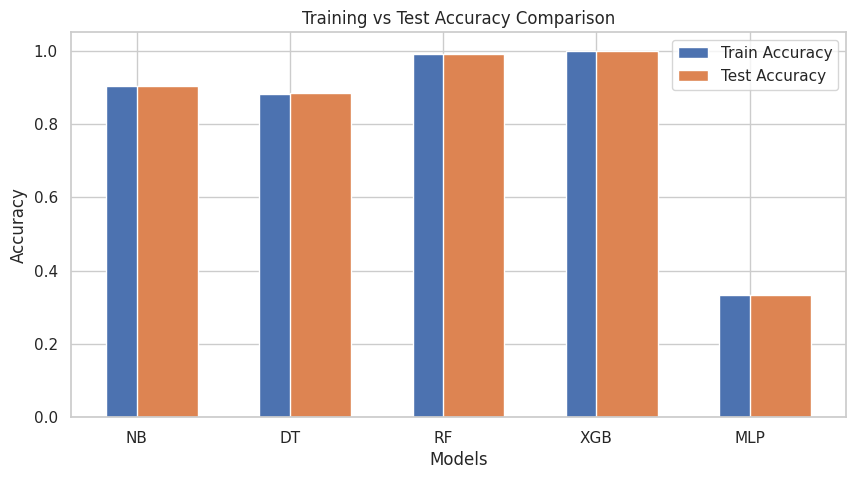

In [408]:
models = ['NB', 'DT', 'RF', 'XGB', 'MLP']
train_acc = [accuracy_score(y_train, y_train_pred_NB),
             accuracy_score(y_train, y_train_pred_DT),
             accuracy_score(y_train, y_train_pred_RF),
             accuracy_score(y_train, y_train_pred_XGB),
             accuracy_score(y_train, y_train_pred_MLP)]
test_acc = [accuracy_score(y_test, y_test_pred_NB),
            accuracy_score(y_test, y_test_pred_DT),
            accuracy_score(y_test, y_test_pred_RF),
            accuracy_score(y_test, y_test_pred_XGB),
            accuracy_score(y_test, y_test_pred_MLP)]
plt.figure(figsize=(10, 5))
plt.bar(models, train_acc, width=0.4, label='Train Accuracy', align='center')
plt.bar(models, test_acc, width=0.4, label='Test Accuracy', align='edge')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Training vs Test Accuracy Comparison')
plt.legend()
plt.ylim(0, 1.05)
plt.show()